In [23]:
import json 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

In [2]:
# read indexer.pkl
indexer = pd.read_pickle('indexer.pkl')

In [49]:
item_feature_big_set = set(indexer['f'].keys())
len(item_feature_big_set)

22

In [9]:
# read item_feat_dict.json
with open('item_feat_dict.json', 'r') as f:
    item_feat_dict = json.load(f)

In [12]:
len(item_feat_dict.keys())

58734

In [43]:
item_feat_dict['47086'].keys()

dict_keys(['112', '117', '118', '119', '120', '100', '101', '102', '122', '114', '116', '121', '111'])

In [61]:
len_item_keys_list = []
features_for_items = set()
all_subset_of_keys = True
for item_id, feat_dict in item_feat_dict.items():
    if set(feat_dict.keys()) - item_feature_big_set != set():
        print(f"Item {item_id} has additional keys: {feat_dict.keys()}")
        all_subset_of_keys = False
    len_item_keys_list.append(len(feat_dict.keys()))
    features_for_items.update(feat_dict.keys())

if all_subset_of_keys:
    print("All item feature dictionaries are subsets of the big set.")
else:
    print("Not all item feature dictionaries are subsets of the big set.")

print(f"Items have {len(features_for_items)} features in total.")

All item feature dictionaries are subsets of the big set.
Items have 14 features in total.


In [62]:
features_not_for_items = item_feature_big_set - features_for_items
print(features_not_for_items)

{'106', '108', '105', '109', '103', '107', '104', '110'}


In [58]:
min(len_item_keys_list), max(len_item_keys_list), np.mean(len_item_keys_list), np.median(len_item_keys_list)

(2, 14, 13.195883134130145, 13.0)

(array([5.0000e+00, 0.0000e+00, 0.0000e+00, 7.0000e+00, 8.0000e+00,
        7.9800e+02, 5.0000e+00, 3.0000e+00, 4.0700e+02, 5.7501e+04]),
 array([ 2. ,  3.2,  4.4,  5.6,  6.8,  8. ,  9.2, 10.4, 11.6, 12.8, 14. ]),
 <BarContainer object of 10 artists>)

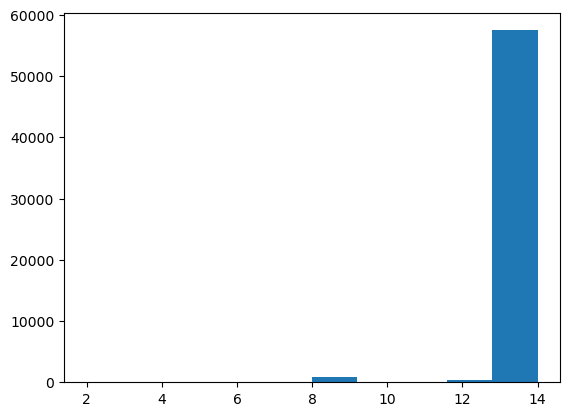

In [60]:
plt.hist(len_item_keys_list)

In [20]:
# read seq.jsonl
with open('seq.jsonl', 'r') as f:
    seqs = [json.loads(line.strip()) for line in f]

In [21]:
len(seqs)

865

In [39]:
seqs[1][-1]

[800,
 8979,
 None,
 {'112': 14,
  '117': 130,
  '118': 702,
  '119': 53,
  '120': 665,
  '121': 16365,
  '100': 6,
  '101': 29,
  '102': 4387,
  '122': 10630,
  '111': 52600,
  '114': 16,
  '115': 17,
  '116': 13},
 0,
 1748043565]

In [32]:
seqs[0][-1][-1]

1748049465

(array([  1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.,   0.,   0.,   0.,   1.,   2.,   1.,   0.,   0.,   0.,   2.,
          0.,   1.,   2.,   0.,   0.,   2.,   0.,   2.,   0.,   1.,   1.,
          2.,   3.,   1.,   1.,   1.,   0.,   2.,   0.,   2.,   4.,   0.,
          2.,   3.,   3.,   1.,   0.,   4.,   3.,   3.,   4.,   0.,   4.,
          5.,   4.,   7.,   0.,   3.,   2.,   6.,  10.,   8.,  10.,   6.,
         11.,  13.,   0.,  10.,  15.,   7.,  16.,  18.,  16.,  20.,  26.,
         27.,   0.,  29.,  37.,  38.,  38.,  55.,  50.,  52.,  71.,  94.,
        100.]),
 array([ 11. ,  11.9,  12.8,  13.7,  14.6,  15.5,  16.4,  17.3,  18.2,
         19.1,  20. ,  20.9,  21.8,  22.7,  23.6,  24.5,  25.4,  26.3,
         27.2,  28.1,  29. ,  29.9,  30.8,  31.7,  32.6,  33.5,  34.4,
         35.3,  36.2,  37.1,  38. ,  38.9,  39.8,  40.7,  41.6,  42.5,
         43.4,  44.3,  45.2,  46.1

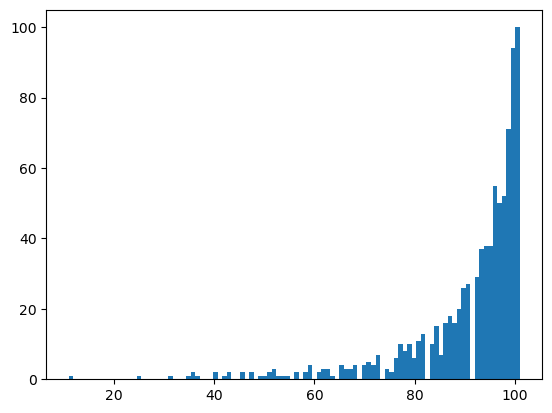

In [24]:
lens = [len(seq) for seq in seqs]
plt.hist(lens, bins=100)

In [50]:
min(lens), max(lens), np.mean(lens), np.median(lens)

(11, 101, 90.89132947976879, 95.0)

In [53]:
interaction_num_list = []
for seq in seqs:
    interaction_num = 0
    for i in range(len(seq)):
        action = seq[i][-2]
        if action == 1:
            interaction_num += 1
    interaction_num_list.append(interaction_num)
min(interaction_num_list), max(interaction_num_list), np.mean(interaction_num_list), np.median(interaction_num_list)

(0, 45, 8.965317919075144, 8.0)

(array([10.,  0., 26.,  0., 47.,  0., 76.,  0., 69.,  0.,  0., 68.,  0.,
        60.,  0., 59.,  0., 65.,  0.,  0., 70.,  0., 56.,  0., 29.,  0.,
        33.,  0., 30.,  0.,  0., 28.,  0., 23.,  0., 26.,  0., 12.,  0.,
         0., 10.,  0., 10.,  0.,  6.,  0.,  9.,  0.,  7.,  0.,  0.,  6.,
         0.,  3.,  0.,  5.,  0.,  5.,  0.,  0.,  3.,  0.,  2.,  0.,  3.,
         0.,  2.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  2.,
         0.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([ 0.  ,  0.45,  0.9 ,  1.35,  1.8 ,  2.25,  2.7 ,  3.15,  3.6 ,
         4.05,  4.5 ,  4.95,  5.4 ,  5.85,  6.3 ,  6.75,  7.2 ,  7.65,
         8.1 ,  8.55,  9.  ,  9.45,  9.9 , 10.35, 10.8 , 11.25, 11.7 ,
        12.15, 12.6 , 13.05, 13.5 , 13.95, 14.4 , 14.85, 15.3 , 15.75,
        16.2 , 16.65, 17.1 , 17.55, 18.  , 18.45, 18.9 , 19.35, 19.8 ,
        20.25, 20.7 , 21.15, 21.6 , 22.05, 22.5 , 22.95, 23.4 , 23.85,
        

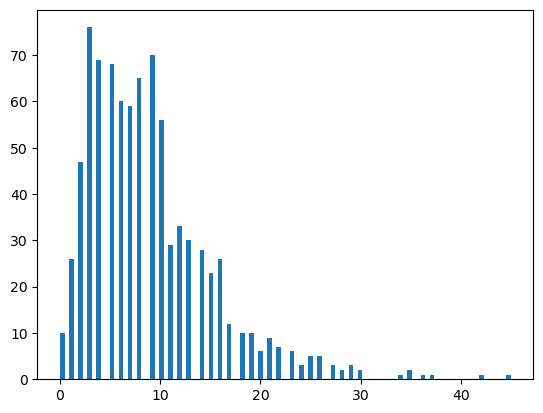

In [54]:
plt.hist(interaction_num_list, bins=100)

In [ ]:
for seq in seqs:
    has_user_feature = 0
    for i in range(len(seq)):
        user_feature = seq[i][2]
        if user_feature is not None:
            has_user_feature = 1
            break
    if has_user_feature == 0:
        print(seq)

In [63]:
user_feature_num_key_list = []
for seq in seqs:
    has_user_feature = 0
    for i in range(len(seq)):
        user_feature = seq[i][2]
        if user_feature is not None:
            user_feature_num_key_list.append(len(user_feature.keys()))
            if set(user_feature.keys()) - features_not_for_items != set():
                print(f"User feature {user_feature} has additional keys: {user_feature.keys()}")
min(user_feature_num_key_list), max(user_feature_num_key_list), np.mean(user_feature_num_key_list), np.median(user_feature_num_key_list)

(1, 8, 5.635838150289017, 5.0)

In [42]:
for seq in seqs:
    has_user_feature = 0
    for i in range(len(seq)):
        user_feature = seq[i][2]
        if user_feature is not None:
            if has_user_feature != 0:
                print("some seqs have multiple user features")
            has_user_feature = 1
        if i < len(seq) - 1:
            print("some seqs see user feature not at the end")  
    if has_user_feature == 0:
        print(seq)

some seqs see user feature not at the end
some seqs see user feature not at the end
some seqs see user feature not at the end
some seqs see user feature not at the end
some seqs see user feature not at the end
some seqs see user feature not at the end
some seqs see user feature not at the end
some seqs see user feature not at the end
some seqs see user feature not at the end
some seqs see user feature not at the end
some seqs see user feature not at the end
some seqs see user feature not at the end
some seqs see user feature not at the end
some seqs see user feature not at the end
some seqs see user feature not at the end
some seqs see user feature not at the end
some seqs see user feature not at the end
some seqs see user feature not at the end
some seqs see user feature not at the end
some seqs see user feature not at the end
some seqs see user feature not at the end
some seqs see user feature not at the end
some seqs see user feature not at the end
some seqs see user feature not at 

In [35]:
for seq in seqs:
    user_feature_at_end = 1
    user_feature_time = seq[-1][-1]
    for i in range(len(seq)-1):
        timestamp = seq[i][-1]
        if timestamp > user_feature_time:
            user_feature_at_end = 0
            break
    if user_feature_at_end == 0:
        print(seq)